In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
%matplotlib inline
#df = pd.read_excel('Desktop/FYPJ Dataset.xlsx', sheet_name = 'Sheet1')
df = pd.read_excel('Desktop/integraltech1.xlsx', sheet_name = 'integraltech')

In [2]:
pd.options.display.max_rows = 65
pd.options.display.max_columns = 65

In [3]:
# Replacing Name

df = df.replace(['^Albumin .*$'], ['Albumin'], regex=True)
df = df.replace(['^Alkaline Phosphatase .*$'], ['Alkaline Phosphatase'], regex=True)
df = df.replace(['^Alpha Feto\- Protein.*$'], ['Alpha Feto- Protein'], regex=True)
df = df.replace(['^Basophils.*$'], ['Basophils'], regex=True)
df = df.replace(['^Calcium.*$'], ['Calcium'], regex=True)
df = df.replace(['^Carcino\-embryonic Antigen.*$'], ['Carcino-embryonic Antigen'], regex=True)
df = df.replace(['^Chloride.*$'], ['Chloride'], regex=True)
df = df.replace(['^Creatinine.*$'], ['Creatinine'], regex=True)
df = df.replace(['^Direct Bilirubin.*$'], ['Direct Bilirubin'], regex=True)
df = df.replace(['^E.S.R.*$'], ['E.S.R'], regex=True)
df = df.replace(['^Eosinophils.*$'], ['Eosinophils'], regex=True)
df = df.replace(['^Free T 4.*$'], ['Free T 4'], regex=True)
df = df.replace(['^Gamma Glutamyltransferase.*$'], ['Gamma Glutamyltransferase'], regex=True)
df = df.replace(['^Globulin.*$'], ['Globulin'], regex=True)
df = df.replace(['^Glucose.*$'], ['Glucose'], regex=True)
df = df.replace(['^HDL Cholesterol.*$'], ['HDL Cholesterol'], regex=True)
df = df.replace(['^Haematocrit.*$'], ['Haematocrit'], regex=True)
df = df.replace(['^Haemoglobin.*$'], ['Haemoglobin'], regex=True)
df = df.replace(['^HbA1c.*$'], ['HbA1c'], regex=True)
df = df.replace(['^Hepatitis A Antibodies.*$'], ['Hepatitis A Antibodies'], regex=True)
df = df.replace(['^Hepatitis A Antigen.*$'], ['Hepatitis A Antigen'], regex=True)
df = df.replace(['^Hepatitis Bs Antibodies.*$'], ['Hepatitis Bs Antibodies'], regex=True)
df = df.replace(['^Inorganic Phosphate.*$'], ['Inorganic Phosphate'], regex=True)
df = df.replace(['^LDL Cholesterol.*$'], ['LDL Cholesterol'], regex=True)
df = df.replace(['^Lymphocytes.*$'], ['Lymphocytes'], regex=True)
df = df.replace(['^MCH.*$'], ['MCH'], regex=True)
df = df.replace(['^MCHC.*$'], ['MCHC'], regex=True)
df = df.replace(['^MCV.*$'], ['MCV'], regex=True)
df = df.replace(['^Monocytes.*$'], ['Monocytes'], regex=True)
df = df.replace(['^Peipheral Blood film.*$'], ['Peipheral Blood film'], regex=True)
df = df.replace(['^Platelet.*$'], ['Platelet'], regex=True)
df = df.replace(['^Polymorph.*$'], ['Polymorph'], regex=True)
df = df.replace(['^Potassium.*$'], ['Potassium'], regex=True)
df = df.replace(['^Sodium.*$'], ['Sodium'], regex=True)
df = df.replace(['^Stool Occult Blood.*$'], ['Stool Occult Blood'], regex=True)
df = df.replace(['^Globulin.*$'], ['Globulin'], regex=True)
df = df.replace(['^Globulin.*$'], ['Globulin'], regex=True)
df = df.replace(['^T.Chol/HDL Cholesterol Ratio.*$'], ['T.Chol/HDL Cholesterol Ratio'], regex=True)
df = df.replace(['^TSH.*$'], ['TSH'], regex=True)
df = df.replace(['^Total Cholesterol.*$'], ['Total Cholesterol'], regex=True)
df = df.replace(['^Total Protein.*$'], ['Total Protein'], regex=True)
df = df.replace(['^Total Red Cell count.*$'], ['Total Red Cell count'], regex=True)
df = df.replace(['^Total White Cell count.*$'], ['Total White Cell count'], regex=True)
df = df.replace(['^Triglycerides.*$'], ['Triglycerides'], regex=True)
df = df.replace(['^Urea.*$'], ['Urea'], regex=True)
df = df.replace(['^Uric Acid.*$'], ['Uric Acid'], regex=True)
df = df.replace(['^Urine Bilirubin.*$'], ['Urine Bilirubin'], regex=True)
df = df.replace(['^Urine Blood.*$'], ['Urine Blood'], regex=True)
df = df.replace(['^Urine Casts.*$'], ['Urine Casts'], regex=True)
df = df.replace(['^Urine Crystal.*$'], ['Urine Crystal'], regex=True)
df = df.replace(['^Urine Epithelial cell.*$'], ['Urine Epithelial cell'], regex=True)
df = df.replace(['^Urine Glucose.*$'], ['Urine Glucose'], regex=True)
df = df.replace(['^Urine Ketone.*$'], ['Urine Ketone'], regex=True)
df = df.replace(['^Urine Micro organism.*$'], ['Urine Micro organism'], regex=True)
df = df.replace(['^Urine Nitrite.*$'], ['Urine Nitrite'], regex=True)
df = df.replace(['^Urine PH.*$'], ['Urine PH'], regex=True)
df = df.replace(['^Urine Protein.*$'], ['Urine Protein'], regex=True)
df = df.replace(['^Urine Red Blood Cell.*$'], ['Urine Red Blood Cell'], regex=True)
df = df.replace(['^Urine Urobilinogen.*$'], ['Urine Urobilinogen'], regex=True)
df = df.replace(['^Urine White Blood cell.*$'], ['Urine White Blood cell'], regex=True)
df = df.replace(['^Urine white blood cell.*$'], ['Urine White Blood cell'], regex=True)
df = df.replace(['^Urine specific gravity.*$'], ['Urine specific gravity'], regex=True)
df = df.replace(['^e GFR.*$'], ['e GFR'], regex=True)

In [4]:
np.unique(df['Name'])

array(['Albumin', 'Alkaline Phosphatase', 'Alpha Feto- Protein',
       'Basophils', 'Calcium', 'Carcino-embryonic Antigen', 'Chloride',
       'Creatinine', 'Direct Bilirubin', 'E.S.R', 'Eosinophils',
       'Free T 4', 'Gamma Glutamyltransferase', 'Globulin', 'Glucose',
       'HDL Cholesterol', 'Haematocrit', 'Haemoglobin', 'HbA1c',
       'Hepatitis A Antibodies', 'Hepatitis A Antigen',
       'Hepatitis Bs Antibodies', 'Inorganic Phosphate',
       'LDL Cholesterol', 'Lymphocytes', 'MCH', 'MCV', 'Monocytes',
       'Peipheral Blood film', 'Platelet', 'Polymorph', 'Potassium',
       'Sodium', 'Stool Occult Blood', 'T.Chol/HDL Cholesterol Ratio',
       'TSH', 'Total Cholesterol', 'Total Protein',
       'Total Red Cell count', 'Total White Cell count', 'Triglycerides',
       'Urea', 'Uric Acid', 'Urine Bilirubin', 'Urine Blood',
       'Urine Casts', 'Urine Crystal', 'Urine Epithelial cell',
       'Urine Glucose', 'Urine Ketone', 'Urine Micro organism',
       'Urine Nitrite', '

In [5]:
# No. of Unique ID = 590
ID = pd.DataFrame({'Id' : df['Unique_Identifier']})
ID = ID.groupby('Id')['Id'].size()
# pd.options.display.max_rows = 590
ID.head()

Id
003d25e3fac5a1d2aa4ba502ffb77b5b     38
0079e1b73a94ba341f53ca22c6910782     43
00d64d073ff05912189aa31bf8ce5d17      3
00f3ce1c7437a60280aa0268e74550ef    118
020971cfb58c7bc5efaf56eac237eeef     60
Name: Id, dtype: int64

In [6]:
s = df
s = pd.Series(s.Unique_Identifier)
s.value_counts().head()

a5455786af2a470951fb5ba4a1564453    131
9d7106e0af82d68a71612badf8281e78    119
b5a59143a5ced25dc140f0cd60e3896f    119
3e4c47f86f29debd8fc1989b98187f9d    119
753f1dffc933b14124ba5971430e0dcc    118
Name: Unique_Identifier, dtype: int64

In [7]:
np.unique(df['Nationality'])

array(['-', 'AMERICAN', 'BANGLADESHI', 'CHINESE', 'FILIPINO', 'INDIAN',
       'INDONESIAN', 'KOREAN', 'MALAYSIAN', 'MYANMAR', 'SINGAPOREAN',
       'SOUTH KOREAN', 'SRI LANKAN', 'VIETNAMESE'], dtype=object)

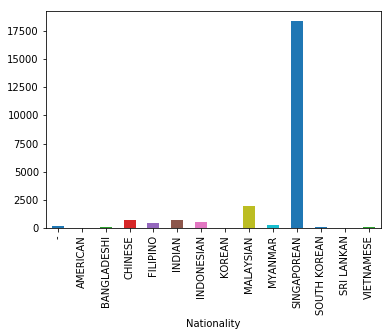

In [8]:
df['Nationality'].groupby(df['Nationality']).count().plot(kind="bar")

In [ ]:
df['Conclusion'].groupby(df['Conclusion']).count().plot(kind="pie")

In [ ]:
                    ######################## ######################## ######################## ########################
                ####################### ######################## ######################## ########################
            ###################### ######################## ######################## ########################
        ##################### ######################## ######################## ########################
    ################### ######################## ######################## ########################

In [14]:
# Id + Nationality, Date + Test Name + Conclusion
Results = pd.DataFrame({'Id' : df['Unique_Identifier'], 'Nationality' : df['Nationality'], 'Date' : df['Test_Date'], 'Name' : df['Name'], 'Score' : df['Score'], 'Conclusion' : df['Conclusion']})

Results.groupby(["Id", "Nationality", "Date", "Name", "Score", "Conclusion"]).count()

Empty DataFrame
Columns: []
Index: [(003d25e3fac5a1d2aa4ba502ffb77b5b, SINGAPOREAN, 2017-05-24 00:00:00, Albumin, 4.7, Desirable), (003d25e3fac5a1d2aa4ba502ffb77b5b, SINGAPOREAN, 2017-05-24 00:00:00, Alkaline Phosphatase, 40.0, Desirable), (003d25e3fac5a1d2aa4ba502ffb77b5b, SINGAPOREAN, 2017-05-24 00:00:00, Basophils, 0.5, Desirable), (003d25e3fac5a1d2aa4ba502ffb77b5b, SINGAPOREAN, 2017-05-24 00:00:00, Calcium, 9.5, Desirable), (003d25e3fac5a1d2aa4ba502ffb77b5b, SINGAPOREAN, 2017-05-24 00:00:00, Chloride, 107.0, Desirable), (003d25e3fac5a1d2aa4ba502ffb77b5b, SINGAPOREAN, 2017-05-24 00:00:00, Creatinine, 0.8, Desirable), (003d25e3fac5a1d2aa4ba502ffb77b5b, SINGAPOREAN, 2017-05-24 00:00:00, Direct Bilirubin, 0.78, High), (003d25e3fac5a1d2aa4ba502ffb77b5b, SINGAPOREAN, 2017-05-24 00:00:00, E.S.R, 22.0, Desirable), (003d25e3fac5a1d2aa4ba502ffb77b5b, SINGAPOREAN, 2017-05-24 00:00:00, Eosinophils, 5.6, Desirable), (003d25e3fac5a1d2aa4ba502ffb77b5b, SINGAPOREAN, 2017-05-24 00:00:00, Gamma Glutamyltransferase, 16.0, Desirable), (003d25e3fac5a1d2aa4ba502ffb77b5b, SINGAPOREAN, 2017-05-24 00:00:00, Globulin, 3.2, Desirable), (003d25e3fac5a1d2aa4ba502ffb77b5b, SINGAPOREAN, 2017-05-24 00:00:00, Glucose, 91.0, High), (003d25e3fac5a1d2aa4ba502ffb77b5b, SINGAPOREAN, 2017-05-24 00:00:00, HDL Cholesterol, 57.0, Desirable), (003d25e3fac5a1d2aa4ba502ffb77b5b, SINGAPOREAN, 2017-05-24 00:00:00, Haematocrit, 38.0, Desirable), (003d25e3fac5a1d2aa4ba502ffb77b5b, SINGAPOREAN, 2017-05-24 00:00:00, Haemoglobin, 12.7, Low), (003d25e3fac5a1d2aa4ba502ffb77b5b, SINGAPOREAN, 2017-05-24 00:00:00, Inorganic Phosphate, 3.4, Desirable), (003d25e3fac5a1d2aa4ba502ffb77b5b, SINGAPOREAN, 2017-05-24 00:00:00, LDL Cholesterol, 92.0, Desirable), (003d25e3fac5a1d2aa4ba502ffb77b5b, SINGAPOREAN, 2017-05-24 00:00:00, Lymphocytes, 36.0, Desirable), (003d25e3fac5a1d2aa4ba502ffb77b5b, SINGAPOREAN, 2017-05-24 00:00:00, MCH, 31.0, Desirable), (003d25e3fac5a1d2aa4ba502ffb77b5b, SINGAPOREAN, 2017-05-24 00:00:00, MCH, 34.0, Desirable), (003d25e3fac5a1d2aa4ba502ffb77b5b, SINGAPOREAN, 2017-05-24 00:00:00, MCV, 93.0, Desirable), (003d25e3fac5a1d2aa4ba502ffb77b5b, SINGAPOREAN, 2017-05-24 00:00:00, Monocytes, 9.9, Desirable), (003d25e3fac5a1d2aa4ba502ffb77b5b, SINGAPOREAN, 2017-05-24 00:00:00, Platelet, 197.0, Desirable), (003d25e3fac5a1d2aa4ba502ffb77b5b, SINGAPOREAN, 2017-05-24 00:00:00, Polymorph, 48.0, Desirable), (003d25e3fac5a1d2aa4ba502ffb77b5b, SINGAPOREAN, 2017-05-24 00:00:00, Potassium, 3.5, Desirable), (003d25e3fac5a1d2aa4ba502ffb77b5b, SINGAPOREAN, 2017-05-24 00:00:00, Sodium, 142.0, Desirable), (003d25e3fac5a1d2aa4ba502ffb77b5b, SINGAPOREAN, 2017-05-24 00:00:00, T.Chol/HDL Cholesterol Ratio, 2.95, Desirable), (003d25e3fac5a1d2aa4ba502ffb77b5b, SINGAPOREAN, 2017-05-24 00:00:00, Total Cholesterol, 168.0, Desirable), (003d25e3fac5a1d2aa4ba502ffb77b5b, SINGAPOREAN, 2017-05-24 00:00:00, Total Protein, 7.9, Desirable), (003d25e3fac5a1d2aa4ba502ffb77b5b, SINGAPOREAN, 2017-05-24 00:00:00, Total Red Cell count, 4.05, Low), (003d25e3fac5a1d2aa4ba502ffb77b5b, SINGAPOREAN, 2017-05-24 00:00:00, Total White Cell count, 6.6, Desirable), (003d25e3fac5a1d2aa4ba502ffb77b5b, SINGAPOREAN, 2017-05-24 00:00:00, Triglycerides, 98.0, Desirable), (003d25e3fac5a1d2aa4ba502ffb77b5b, SINGAPOREAN, 2017-05-24 00:00:00, Urea, 32.0, Desirable), (003d25e3fac5a1d2aa4ba502ffb77b5b, SINGAPOREAN, 2017-05-24 00:00:00, Uric Acid, 4.1, Desirable), (0079e1b73a94ba341f53ca22c6910782, SINGAPOREAN, 2016-01-14 00:00:00, Albumin, 3.9, Desirable), (0079e1b73a94ba341f53ca22c6910782, SINGAPOREAN, 2016-01-14 00:00:00, Alkaline Phosphatase, 50.0, Desirable), (0079e1b73a94ba341f53ca22c6910782, SINGAPOREAN, 2016-01-14 00:00:00, Basophils, 1.0, Desirable), (0079e1b73a94ba341f53ca22c6910782, SINGAPOREAN, 2016-01-14 00:00:00, Chloride, 98.0, Desirable), (0079e1b73a94ba341f53ca22c6910782, SINGAPOREAN, 2016-01-14 00:00:00, Creatinine, 1.1, Desirable), (0079e1b73a94ba341f53ca22c6910782, SINGAPOREAN, 2016-01-14 00:00:00, Direct Bilir

In [16]:
# Shows all the test with the same Conclusion, of the same Id and Date, score of test or null

yTestStats = pd.DataFrame({'Id' : df['Unique_Identifier'], 'Date' : df['Test_Date'], 'Name' : df['Name'], 'Score' : df['Score'], 'Conclusion' : df['Conclusion']})

#yTestStats = yTestStats.groupby(["Id", "Date", "Conclusion", "Name"]).mean()
#yTestStats = yTestStats.reset_index()

#yTestStats = yTestStats.groupby(['Id','Date','Conclusion','Score','Name'])[['Name']].count().unstack(fill_value=0)

yTestStats = yTestStats.pivot_table(index=['Id','Date','Conclusion'], columns = 'Name', values='Score').reset_index()
#yTestStats = yTestStats.pivot_table(index=['Id','Date','Conclusion'], columns = 'Name', values='Score', fill_value='NA').reset_index()
#yTestStats.info()

yTestStats

Name,Id,Date,Conclusion,Albumin,Alkaline Phosphatase,Alpha Feto- Protein,Basophils,Calcium,Carcino-embryonic Antigen,Chloride,Creatinine,Direct Bilirubin,E.S.R,Eosinophils,Free T 4,Gamma Glutamyltransferase,Globulin,Glucose,HDL Cholesterol,Haematocrit,Haemoglobin,HbA1c,Inorganic Phosphate,LDL Cholesterol,Lymphocytes,MCH,MCV,Monocytes,Platelet,Polymorph,Potassium,Sodium,T.Chol/HDL Cholesterol Ratio,TSH,Total Cholesterol,Total Protein,Total Red Cell count,Total White Cell count,Triglycerides,Urea,Uric Acid,Urine PH,Urine specific gravity,e GFR
0,003d25e3fac5a1d2aa4ba502ffb77b5b,2017-05-24,Desirable,4.7,40.0,NaN,0.5,9.5,NaN,107.0,0.8,NaN,22.0,5.6,NaN,16.0,3.2,NaN,57.0,38.0,NaN,NaN,3.4,92.0,36.0,32.5,93.0,9.9,197.0,48.0,3.5,142.0,2.95,NaN,168.0,7.9,NaN,6.6,98.0,32.0,4.1,NaN,NaN,NaN
1,003d25e3fac5a1d2aa4ba502ffb77b5b,2017-05-24,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.78,NaN,NaN,NaN,NaN,NaN,91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,003d25e3fac5a1d2aa4ba502ffb77b5b,2017-05-24,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0079e1b73a94ba341f53ca22c6910782,2016-01-14,Desirable,3.9,50.0,NaN,1.0,NaN,NaN,98.0,1.1,NaN,NaN,3.9,NaN,16.0,3.7,NaN,64.0,38.0,NaN,NaN,NaN,NaN,36.0,30.5,90.0,8.6,301.0,50.5,4.2,NaN,3.81,NaN,NaN,7.6,NaN,7.0,NaN,42.0,NaN,NaN,NaN,NaN
4,0079e1b73a94ba341f53ca22c6910782,2016-01-14,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.48,41.0,NaN,NaN,NaN,NaN,93.0,NaN,NaN,NaN,NaN,NaN,147.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,244.0,NaN,NaN,NaN,169.0,NaN,8.4,NaN,NaN,NaN
5,0079e1b73a94ba341f53ca22c6910782,2016-01-14,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130.0,NaN,NaN,NaN,NaN,4.20,NaN,NaN,NaN,NaN,NaN,NaN,54.0
6,0079e1b73a94ba341f53ca22c6910782,2016-06-08,Desirable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,NaN,NaN,NaN,NaN,87.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.79,NaN,170.0,NaN,NaN,NaN,114.0,NaN,NaN,NaN,NaN,NaN
7,0079e1b73a94ba341f53ca22c6910782,2016-06-08,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN
8,0079e1b73a94ba341f53ca22c6910782,2016-10-18,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.3,NaN,NaN,NaN
9,00f3ce1c7437a60280aa0268e74550ef,2016-10-16,Desirable,4.0,95.0,2.18,1.0,9.0,3.52,103.0,0.7,NaN,NaN,3.2,NaN,19.0,2.8,NaN,47.0,38.0,NaN,NaN,4.4,113.0,16.6,32.5,95.0,7.2,NaN,72.0,3.7,140.0,3.72,2.8870,175.0,6.8,NaN,10.0,76.0,27.0,4.4,6.5,1.010,NaN


In [17]:
# Conclusion based on Glucose, all test based on conclusion. Ignores test with different conclusion
##########################################################################################

yTestStats = pd.DataFrame({'Id' : df['Unique_Identifier'], 'Date' : df['Test_Date'], 'Name' : df['Name'], 'Score' : df['Score'], 'Conclusion' : df['Conclusion']})

#yTestStats = yTestStats.groupby(["Id", "Date", "Conclusion", "Name"]).mean()
#yTestStats = yTestStats.reset_index()

#yTestStats = yTestStats.groupby(['Id','Date','Conclusion','Score','Name'])[['Name']].count().unstack(fill_value=0)

yTestStats = yTestStats.pivot_table(index=['Id','Date', 'Conclusion'], columns = 'Name', values='Score').reset_index()
#yTestStats = yTestStats.pivot_table(index=['Id','Date','Conclusion'], columns = 'Name', values='Score', fill_value='NA').reset_index()
#yTestStats.info()

yTestStats = yTestStats[yTestStats.Glucose.notnull()]
yTestStats

Name,Id,Date,Conclusion,Albumin,Alkaline Phosphatase,Alpha Feto- Protein,Basophils,Calcium,Carcino-embryonic Antigen,Chloride,Creatinine,Direct Bilirubin,E.S.R,Eosinophils,Free T 4,Gamma Glutamyltransferase,Globulin,Glucose,HDL Cholesterol,Haematocrit,Haemoglobin,HbA1c,Inorganic Phosphate,LDL Cholesterol,Lymphocytes,MCH,MCV,Monocytes,Platelet,Polymorph,Potassium,Sodium,T.Chol/HDL Cholesterol Ratio,TSH,Total Cholesterol,Total Protein,Total Red Cell count,Total White Cell count,Triglycerides,Urea,Uric Acid,Urine PH,Urine specific gravity,e GFR
1,003d25e3fac5a1d2aa4ba502ffb77b5b,2017-05-24,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.78,NaN,NaN,NaN,NaN,NaN,91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0079e1b73a94ba341f53ca22c6910782,2016-01-14,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.48,41.0,NaN,NaN,NaN,NaN,93.0,NaN,NaN,NaN,NaN,NaN,147.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,244.0,NaN,NaN,NaN,169.0,NaN,8.4,NaN,NaN,NaN
10,00f3ce1c7437a60280aa0268e74550ef,2016-10-16,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.12,55.0,NaN,12.73,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,447.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,00f3ce1c7437a60280aa0268e74550ef,2017-09-09,High,NaN,121.0,NaN,NaN,NaN,NaN,NaN,NaN,0.61,97.0,NaN,13.14,NaN,4.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.3,NaN,NaN,NaN,NaN,6.4,NaN,NaN,NaN
17,020971cfb58c7bc5efaf56eac237eeef,2016-11-09,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.83,NaN,NaN,13.53,NaN,NaN,129.0,NaN,NaN,NaN,NaN,NaN,162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,251.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,021ded5c60a28a425a50a8a580f5a0a1,2017-11-11,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.59,98.0,NaN,NaN,NaN,3.9,88.0,NaN,NaN,NaN,NaN,NaN,191.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.76,NaN,257.0,8.4,NaN,NaN,NaN,NaN,6.9,NaN,NaN,NaN
24,03664e3f947017c10b3cd34fa4f9e614,2016-12-23,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0,NaN,NaN,NaN,NaN,NaN,134.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN
26,0379b4fa0479b392b77348e7527c75a6,2016-10-25,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.14,48.0,NaN,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,180.0,NaN,NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,275.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,03d53add755405ef80fbca611dc779c0,2016-03-24,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.02,NaN,NaN,11.93,NaN,NaN,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,0483886f6a9dc55af4c98265f603b1c1,2017-05-05,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.53,32.0,NaN,12.78,NaN,NaN,91.0,NaN,NaN,NaN,NaN,NaN,165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.66,NaN,232.0,NaN,NaN,10.6,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
                    ######################## ######################## ######################## ########################
                ####################### ######################## ######################## ########################
            ###################### ######################## ######################## ########################
        ##################### ######################## ######################## ########################
    ################### ######################## ######################## ########################

In [18]:
# Id, Date, Score for each test and Conclusion of Glucose. Test not taken = Null
# Conclusion: Not high, for those Id that did not take Glucose test.

testScorez = pd.DataFrame({'Id' : df['Unique_Identifier'], 'Date' : df['Test_Date'], 'Name' : df['Name'], 'Score' : df['Score']})

testScorez = testScorez.pivot_table(index=['Id','Date'], columns = 'Name', values='Score').reset_index()
#testScorez = testScorez[testScorez.Glucose.notnull()]
testScorez.Glucose = testScorez.Glucose.fillna(0)

conclusionz = pd.DataFrame({'Id' : df['Unique_Identifier'], 'Date' : df['Test_Date'], 'Name' : df['Name'], 'Score' : df['Score'], 'Conclusion' : df['Conclusion']})
conclusionz = conclusionz.pivot_table(index=['Id','Date', 'Conclusion'], columns = 'Name', values='Score').reset_index()
conclusionz = conclusionz[conclusionz.Glucose.notnull()]


testScorez['Conclusion'] = 0
testScorez.loc[testScorez.Glucose == 0, 'Conclusion'] = 'Not high'
testScorez.loc[testScorez.Glucose != 0, 'Conclusion'] = conclusionz['Conclusion'].values
testScorez

Name,Id,Date,Albumin,Alkaline Phosphatase,Alpha Feto- Protein,Basophils,Calcium,Carcino-embryonic Antigen,Chloride,Creatinine,Direct Bilirubin,E.S.R,Eosinophils,Free T 4,Gamma Glutamyltransferase,Globulin,Glucose,HDL Cholesterol,Haematocrit,Haemoglobin,HbA1c,Hepatitis A Antibodies,Hepatitis A Antigen,Hepatitis Bs Antibodies,Inorganic Phosphate,LDL Cholesterol,Lymphocytes,MCH,MCV,Monocytes,Peipheral Blood film,Platelet,Polymorph,Potassium,Sodium,Stool Occult Blood,T.Chol/HDL Cholesterol Ratio,TSH,Total Cholesterol,Total Protein,Total Red Cell count,Total White Cell count,Triglycerides,Urea,Uric Acid,Urine Bilirubin,Urine Blood,Urine Casts,Urine Crystal,Urine Epithelial cell,Urine Glucose,Urine Ketone,Urine Micro organism,Urine Nitrite,Urine PH,Urine Protein,Urine Red Blood Cell,Urine Urobilinogen,Urine White Blood cell,Urine specific gravity,e GFR,Conclusion
0,003d25e3fac5a1d2aa4ba502ffb77b5b,2017-05-24,4.7,40.0,NaN,0.5,9.5,NaN,107.0,0.8,0.78,22.0,5.6,NaN,16.0,3.2,91.0,57.0,38.0,12.7,NaN,NaN,0.0,0.0,3.4,92.0,36.0,32.5,93.0,9.9,0.0,197.0,48.0,3.5,142.0,NaN,2.95,NaN,168.0,7.9,4.05,6.6,98.0,32.0,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,High
1,0079e1b73a94ba341f53ca22c6910782,2016-01-14,3.9,50.0,NaN,1.0,NaN,NaN,98.0,1.1,0.48,41.0,3.9,NaN,16.0,3.7,93.0,64.0,38.0,12.2,NaN,NaN,0.0,0.0,NaN,147.0,36.0,30.5,90.0,8.6,0.0,301.0,50.5,4.2,130.0,NaN,3.81,NaN,244.0,7.6,4.20,7.0,169.0,42.0,8.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,High
2,0079e1b73a94ba341f53ca22c6910782,2016-06-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.79,NaN,170.0,NaN,NaN,NaN,114.0,NaN,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not high
3,0079e1b73a94ba341f53ca22c6910782,2016-10-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not high
4,00d64d073ff05912189aa31bf8ce5d17,2017-07-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not high
5,00f3ce1c7437a60280aa0268e74550ef,2016-10-16,4.0,95.0,2.18,1.0,9.0,3.52,103.0,0.7,1.12,55.0,3.2,12.73,19.0,2.8,85.0,47.0,38.0,12.7,NaN,0.0,0.0,0.0,4.4,113.0,16.6,32.5,95.0,7.2,0.0,447.0,72.0,3.7,140.0,NaN,3.72,2.8870,175.0,6.8,4.02,10.0,76.0,27.0,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.5,0.0,0.0,0.0,0.0,1.010,0.0,High
6,00f3ce1c7437a60280aa0268e74550ef,2017-09-09,4.3,121.0,2.58,0.4,9.5,2.65,103.0,0.7,0.61,97.0,3.0,13.14,17.0,4.0,76.0,61.0,39.0,13.1,NaN,0.0,0.0,0.0,3.9,117.0,18.6,31.5,91.0,4.9,0.0,360.0,73.1,3.6,141.0,NaN,3.10,4.1569,189.0,8.3,4.30,10.0,59.0,40.0,6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,High
7,00f3ce1c7437a60280aa0268e74550ef,2017-09-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,1.010,NaN,Not high
8,020971cfb58c7bc5efaf56eac237eeef,2016-11-09,4.3,75.0,5.05,0.1,9.7,1.12,103.0,0.8,0.83,19.0,3.1,13.53,33.0,3.0,129.0,74.0,46.0,14.9,NaN,0.0,0.0,0.0,3.1,162.0,27.4,31.0,89.0,7.0,0.0,247.0,62.4,3.9,141.0,0.0,3.39,1.0664,251.0,7.3,5.14,6.9,78.0,24.0,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,1.005,0.0,High
9,021ded5c60a28a425a50a8a580f5a0a1,2017-11-11,4.5,53.0,NaN,0.4,9.6,NaN,101.0,0.8,0.59,98.0,2.6,NaN,29.0,3.9,88.0,38.0,46.0,15.3,NaN,NaN,0.0,0.0,3.3,191.0,33.9,31.5,86.0,6.2,0.0,242.0,56.9,4.0,138.0,NaN,6.76,NaN,257.0,8.4,5.29,4.6,142.0,20.0,6.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,High


In [ ]:
                    ######################## ######################## ######################## ########################
                ####################### ######################## ######################## ########################
            ###################### ######################## ######################## ########################
        ##################### ######################## ######################## ########################
    ################### ######################## ######################## ########################

In [19]:
# Id, Date, Score for each test and Conclusion of Glucose. Test not taken = Null
# Only Conclusion: High

testScore = pd.DataFrame({'Id' : df['Unique_Identifier'], 'Date' : df['Test_Date'], 'Name' : df['Name'], 'Score' : df['Score']})

testScore = testScore.pivot_table(index=['Id','Date'], columns = 'Name', values='Score').reset_index()
testScore = testScore[testScore.Glucose.notnull()]

conclusion = pd.DataFrame({'Id' : df['Unique_Identifier'], 'Date' : df['Test_Date'], 'Name' : df['Name'], 'Score' : df['Score'], 'Conclusion' : df['Conclusion']})
conclusion = conclusion.pivot_table(index=['Id','Date', 'Conclusion'], columns = 'Name', values='Score').reset_index()
conclusion = conclusion[conclusion.Glucose.notnull()]

testScore['Conclusion'] = conclusion['Conclusion'].values
testScore

Name,Id,Date,Albumin,Alkaline Phosphatase,Alpha Feto- Protein,Basophils,Calcium,Carcino-embryonic Antigen,Chloride,Creatinine,Direct Bilirubin,E.S.R,Eosinophils,Free T 4,Gamma Glutamyltransferase,Globulin,Glucose,HDL Cholesterol,Haematocrit,Haemoglobin,HbA1c,Hepatitis A Antibodies,Hepatitis A Antigen,Hepatitis Bs Antibodies,Inorganic Phosphate,LDL Cholesterol,Lymphocytes,MCH,MCV,Monocytes,Peipheral Blood film,Platelet,Polymorph,Potassium,Sodium,Stool Occult Blood,T.Chol/HDL Cholesterol Ratio,TSH,Total Cholesterol,Total Protein,Total Red Cell count,Total White Cell count,Triglycerides,Urea,Uric Acid,Urine Bilirubin,Urine Blood,Urine Casts,Urine Crystal,Urine Epithelial cell,Urine Glucose,Urine Ketone,Urine Micro organism,Urine Nitrite,Urine PH,Urine Protein,Urine Red Blood Cell,Urine Urobilinogen,Urine White Blood cell,Urine specific gravity,e GFR,Conclusion
0,003d25e3fac5a1d2aa4ba502ffb77b5b,2017-05-24,4.7,40.0,NaN,0.5,9.5,NaN,107.0,0.8,0.78,22.0,5.6,NaN,16.0,3.2,91.0,57.0,38.0,12.7,NaN,NaN,0.0,0.0,3.4,92.0,36.0,32.5,93.0,9.9,0.0,197.0,48.0,3.5,142.0,NaN,2.95,NaN,168.0,7.9,4.05,6.6,98.0,32.0,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,High
1,0079e1b73a94ba341f53ca22c6910782,2016-01-14,3.9,50.0,NaN,1.0,NaN,NaN,98.0,1.1,0.48,41.0,3.9,NaN,16.0,3.7,93.0,64.0,38.0,12.2,NaN,NaN,0.0,0.0,NaN,147.0,36.0,30.5,90.0,8.6,0.0,301.0,50.5,4.2,130.0,NaN,3.81,NaN,244.0,7.6,4.20,7.0,169.0,42.0,8.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,High
5,00f3ce1c7437a60280aa0268e74550ef,2016-10-16,4.0,95.0,2.18,1.0,9.0,3.52,103.0,0.7,1.12,55.0,3.2,12.73,19.0,2.8,85.0,47.0,38.0,12.7,NaN,0.0,0.0,0.0,4.4,113.0,16.6,32.5,95.0,7.2,0.0,447.0,72.0,3.7,140.0,NaN,3.72,2.8870,175.0,6.8,4.02,10.0,76.0,27.0,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.5,0.0,0.0,0.0,0.0,1.010,0.0,High
6,00f3ce1c7437a60280aa0268e74550ef,2017-09-09,4.3,121.0,2.58,0.4,9.5,2.65,103.0,0.7,0.61,97.0,3.0,13.14,17.0,4.0,76.0,61.0,39.0,13.1,NaN,0.0,0.0,0.0,3.9,117.0,18.6,31.5,91.0,4.9,0.0,360.0,73.1,3.6,141.0,NaN,3.10,4.1569,189.0,8.3,4.30,10.0,59.0,40.0,6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,High
8,020971cfb58c7bc5efaf56eac237eeef,2016-11-09,4.3,75.0,5.05,0.1,9.7,1.12,103.0,0.8,0.83,19.0,3.1,13.53,33.0,3.0,129.0,74.0,46.0,14.9,NaN,0.0,0.0,0.0,3.1,162.0,27.4,31.0,89.0,7.0,0.0,247.0,62.4,3.9,141.0,0.0,3.39,1.0664,251.0,7.3,5.14,6.9,78.0,24.0,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,1.005,0.0,High
9,021ded5c60a28a425a50a8a580f5a0a1,2017-11-11,4.5,53.0,NaN,0.4,9.6,NaN,101.0,0.8,0.59,98.0,2.6,NaN,29.0,3.9,88.0,38.0,46.0,15.3,NaN,NaN,0.0,0.0,3.3,191.0,33.9,31.5,86.0,6.2,0.0,242.0,56.9,4.0,138.0,NaN,6.76,NaN,257.0,8.4,5.29,4.6,142.0,20.0,6.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,High
12,03664e3f947017c10b3cd34fa4f9e614,2016-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,91.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.26,NaN,200.0,NaN,NaN,NaN,96.0,33.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
13,0379b4fa0479b392b77348e7527c75a6,2016-10-25,4.1,62.0,NaN,0.4,9.3,NaN,104.0,0.7,1.14,48.0,3.0,NaN,12.0,2.9,78.0,77.0,39.0,11.7,NaN,NaN,0.0,0.0,3.8,180.0,35.8,31.5,99.0,9.4,0.0,305.0,51.4,3.3,144.0,NaN,3.57,NaN,275.0,7.0,3.93,4.6,91.0,42.0,3.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,High
14,03d53add755405ef80fbca611dc779c0,2016-03-24,4.2,43.0,0.00,0.1,9.0,0.83,103.0,0.7,1.02,16.0,1.1,11.93,14.0,2.6,83.0,48.0,41.0,13.1,NaN,0.0,0.0,0.0,3.3,106.0,31.0,30.5,91.0,6.9,0.0,245.0,60.9,3.7,139.0,0.0,3.50,1.0440,168.0,6.8,4.50,5.9,72.0,25.0,4.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.5,0.0,0.0,0.0,0.0,1.010,0.0,High
16,0483886f6a9dc55af4c98265f603b1c1,2017-05-05,4.1,69.0,0.00,0.1,8.9,0.95,102.0,0.7,0.53,32.0,1.7,12.78,31.0,3.5,91.0,41.0,37.0,12.0,NaN,0.0,0.0,0.0,3.6,165.0,34.1,31.0,88.0,5.2,0.0,422.0,58.9,3.6,138.0,NaN,5.66,3.2528,232.0,7.6,4.15,10.6,133.0,13.0,5.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [21]:
# Id + Gender + Nationality, Profile_Name + Age + Test_Date, Test Name
NewResults = pd.DataFrame({'Id' : df['Unique_Identifier'], 'Profile_Name' : df['Profile_Name'], 'Gender' : df['Gender'], 'Age' : df['Age'],'Nationality' : df['Nationality'], 'Test_Date' : df['Test_Date'], 'Name' : df['Name'], 'Conclusion' : df['Conclusion']})

NewResults.groupby(['Id', 'Gender', 'Nationality', 'Profile_Name', 'Age', 'Test_Date', 'Name']).count().unstack(fill_value=0)


Conclusion  \
Name                                                                                          Albumin   
Id                               Gender Nationality Profile_Name            Age Test_Date               
003d25e3fac5a1d2aa4ba502ffb77b5b F      SINGAPOREAN LIFE1                   67  2017-05-24          1   
0079e1b73a94ba341f53ca22c6910782 F      SINGAPOREAN LIFE1                   44  2016-01-14          1   
                                                    LP5                     45  2016-06-08          0   
                                                    UA                      45  2016-10-18          0   
00d64d073ff05912189aa31bf8ce5d17 F      SINGAPOREAN HLP3                    55  2017-07-24          0   
00f3ce1c7437a60280aa0268e74550ef F      SINGAPOREAN LIFE3 FEMALE            68  2016-10-16          1   
                                                                            69  2017-09-09          1   
                                                    UFEME(FOC)              69  2017-09-18          0   
020971cfb58c7bc5efaf56eac237eeef M      SINGAPOREAN LIFE3 MALE,HBA1CP       58  2016-11-09          1   
021ded5c60a28a425a50a8a580f5a0a1 M      INDONESIAN  LIFE1                   35  2017-11-11          1   
02ae9d11341d75b3fa1116a73f98fab3 M      SINGAPOREAN TP4,K                   75  2017-01-20          0   
02b0c4f80eb74c541b4fe168f996cd34 M      -           RHP1N,FBC               46  2017-03-30          0   
03664e3f947017c10b3cd34fa4f9e614 M      SINGAPOREAN LP7,HBA1CP,UMAP         43  2016-12-23          0   
0379b4fa0479b392b77348e7527c75a6 F      SINGAPOREAN LIFE1                   77  2016-10-25          1   
03d53add755405ef80fbca611dc779c0 F      SINGAPOREAN LIFE3 FEMALE            33  2016-03-24          1   
0483886f6a9dc55af4c98265f603b1c1 F      SINGAPOREAN HLP1                    44  2017-03-09          0   
                                                    LIFE3 FEMALE            45  2017-05-05          1   
054581ea7e73e95d28c0f994f2338e40 F      SINGAPOREAN LIFE3 FEMALE,PAP        35  2016-01-30          1   
058dd83e3886356f6ae93bc7097ac321 F      INDIAN      LIFE3 FEMALE,HBA1CP     35  2016-02-13          1   
064986a009327172e10e95e45fb5b307 F      SINGAPOREAN LIFE3 FEMALE            30  2016-01-27          1   
06c1c505d703cd44cf6c82928b412d9f F      SINGAPOREAN LIFE1                   74  2017-04-15          1   
                                                    LIFE2                   73  2016-04-19          1   
08c31ec9e0901ed3ea26bd1d443bebbf M      SINGAPOREAN LIFE3 MALE              50  2017-02-07          1   
08d4bf28bc1c6987e4fb77e523266dbf M      SINGAPOREAN LIFE1                   54  2017-10-31          1   
                                                    LIFE3 MALE              52  2016-04-27          1   
09c3ec22be1ceefa695f48c57efb6075 M      KOREAN      HLP3,WPP3               19  2017-03-07          0   
0a1415cf7d588c17201119b9b8749731 F      SINGAPOREAN LIFE2,PBF (FREE)        21  2017-04-23          1   
                                                    UFEME(FOC),STOB (FOC)   21  2017-05-02          0   
0a49b8e857b46b878e6ccef2e88f105e F      SINGAPOREAN LIFE3 FEMALE            57  2016-05-12          1   
0a8d3e5e56480de2fc52d44fa54842bf F      SINGAPOREAN LIFE3 FEMALE            43  2017-04-29          1   
0b451e5c41bef723bad7e885d664a0ff F      SINGAPOREAN LIFE2                   46  2016-07-25          1   
0b60810b92149ea522d24b1737a92bab F      SINGAPOREAN LIFE1                   70  2017-03-27          1   
...                                                                                               ...   
f7c65301a040f201ac4f4f88cd0d3e71 M      SINGAPOREAN LIFE1                   53  2017-11-24          1   
f7cef792ad41ca6b6c54a81686ef995e M      FILIPINO    LP01                    52  2017-09-02          0   
                                                    LP1                     52  2017-05-20          0

In [22]:
# Array

abc = NewResults.groupby(['Id', 'Gender', 'Nationality', 'Profile_Name', 'Age', 'Test_Date', 'Name']).count().unstack(fill_value=0)

#abc.columns = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50','51','52','53','54','55','56','57','58','59','60','61']
ddd = abc.loc['003d25e3fac5a1d2aa4ba502ffb77b5b':'ffa1c31426a5f26e26860382fc9ae454']
#ddd = ddd.loc['Conclusion']
ddd.values

#ddd = [[i] for i in ddd.values]
#ddd



array([[1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [1, 1, 1, ..., 0, 1, 0]], dtype=int64)

In [23]:
zResults = pd.DataFrame({'Id' : df['Unique_Identifier'], 'Gender' : df['Gender'], 'Test_Date' : df['Test_Date'], 'Age' : df['Age'], 'Name' : df['Name'], 'Conclusion' : df['Conclusion']})
#textReplace = {'Desirable': 0, 'High': 1, 'Low': 1}
#zResults.Conclusion = [textReplace[i] for i in zResults.Conclusion]

abcd = zResults.groupby(['Id', 'Gender', 'Test_Date', 'Age', 'Name']).count().unstack(fill_value=0)
abcd = abcd.loc['003d25e3fac5a1d2aa4ba502ffb77b5b':'ffa1c31426a5f26e26860382fc9ae454']

#abcd['Conclusion', 'Conclusion'] = zResults['Conclusion']
#abcd = abcd.sort_index()
abcd
#yyy = ['Albumin', 'Alkaline Phosphatase', 'Alpha Feto- Protein', 'Basophils', 'Calcium', 'Carcino-embryonic Antigen', 'Chloride', 'Creatinine', 'Direct Bilirubin', 'E.S.R', 'Eosinophils', 'Free T 4', 'Gamma Glutamyltransferase', 'Globulin', 'Glucose', 'HDL Cholesterol', 'Haematocrit', 'Haemoglobin', 'HbA1c', 'Hepatitis A Antibodies', 'Hepatitis A Antigen', 'Hepatitis Bs Antibodies', 'Inorganic Phosphate', 'LDL Cholesterol', 'Lymphocytes', 'MCH', 'MCHC', 'MCV', 'Monocytes', 'Peipheral Blood film', 'Platelet', 'Polymorph', 'Potassium', 'Sodium', 'Stool Occult Blood', 'T.Chol/HDL Cholesterol Ratio', 'TSH', 'Total Cholesterol', 'Total Protein', 'Total Red Cell count', 'Total White Cell count', 'Triglycerides', 'Urea', 'Uric Acid', 'Urine Bilirubin', 'Urine Blood', 'Urine Casts', 'Urine Crystal', 'Urine Epithelial cell', 'Urine Glucose', 'Urine Ketone', 'Urine Micro organism', 'Urine Nitrite', 'Urine PH', 'Urine Protein', 'Urine Red Blood Cell', 'Urine Urobilinogen', 'Urine White Blood cell', 'Urine specific gravity', 'Urine white blood cell', 'e GFR']
#yyy


Conclusion  \
Name                                                      Albumin   
Id                               Gender Test_Date  Age              
003d25e3fac5a1d2aa4ba502ffb77b5b F      2017-05-24 67           1   
0079e1b73a94ba341f53ca22c6910782 F      2016-01-14 44           1   
                                        2016-06-08 45           0   
                                        2016-10-18 45           0   
00d64d073ff05912189aa31bf8ce5d17 F      2017-07-24 55           0   
00f3ce1c7437a60280aa0268e74550ef F      2016-10-16 68           1   
                                        2017-09-09 69           1   
                                        2017-09-18 69           0   
020971cfb58c7bc5efaf56eac237eeef M      2016-11-09 58           1   
021ded5c60a28a425a50a8a580f5a0a1 M      2017-11-11 35           1   
02ae9d11341d75b3fa1116a73f98fab3 M      2017-01-20 75           0   
02b0c4f80eb74c541b4fe168f996cd34 M      2017-03-30 46           0   
03664e3f947017c10b3cd34fa4f9e614 M      2016-12-23 43           0   
0379b4fa0479b392b77348e7527c75a6 F      2016-10-25 77           1   
03d53add755405ef80fbca611dc779c0 F      2016-03-24 33           1   
0483886f6a9dc55af4c98265f603b1c1 F      2017-03-09 44           0   
                                        2017-05-05 45           1   
054581ea7e73e95d28c0f994f2338e40 F      2016-01-30 35           1   
058dd83e3886356f6ae93bc7097ac321 F      2016-02-13 35           1   
064986a009327172e10e95e45fb5b307 F      2016-01-27 30           1   
06c1c505d703cd44cf6c82928b412d9f F      2016-04-19 73           1   
                                        2017-04-15 74           1   
08c31ec9e0901ed3ea26bd1d443bebbf M      2017-02-07 50           1   
08d4bf28bc1c6987e4fb77e523266dbf M      2016-04-27 52           1   
                                        2017-10-31 54           1   
09c3ec22be1ceefa695f48c57efb6075 M      2017-03-07 19           0   
0a1415cf7d588c17201119b9b8749731 F      2017-04-23 21           1   
                                        2017-05-02 21           0   
0a49b8e857b46b878e6ccef2e88f105e F      2016-05-12 57           1   
0a8d3e5e56480de2fc52d44fa54842bf F      2017-04-29 43           1   
0b451e5c41bef723bad7e885d664a0ff F      2016-07-25 46           1   
0b60810b92149ea522d24b1737a92bab F      2017-03-27 70           1   
...                                                           ...   
f7c65301a040f201ac4f4f88cd0d3e71 M      2017-11-24 53           1   
f7cef792ad41ca6b6c54a81686ef995e M      2017-05-20 52           0   
                                        2017-09-02 52           0   
                                        2017-10-19 53           0   
f82ce349635ceac897fe71e1411f2532 F      2017-02-01 47           1   
f8def81f902f91b6fe5c4ccdda64c527 M      2016-03-17 75           1   
                                        2017-06-10 76           1   
f932b267061312942db6f8a529c81461 F      2017-08-12 64           1   
f946f5a4b447611c1e166fc688f5c798 F      2017-04-20 42           1   
f9acf703bd4b2a647c1325e30ddef4c5 M      2017-12-02 31           1   
fa6da6b59db08f44fa597c9fc998c74d M      2017-05-06 28           0   
fa8192bfb97978f946ce7825ff28ca68 M      2017-07-21 56           1   
fa851616698eabbb209ce46c3783f6e8 M      2017-12-30 37           1   
fae0c56f9b4cce0ca15b16b84fc2dd06 M      2017-01-25 42           1   
fafa59bad1b0ba7b7372a6c6306568da F      2016-04-11 49           1   
fc159d50ea37aa58e23ea7e897132d6e M      2016-09-23 44           1   
fdd1e5b67ee4189e9483a50a40c6294c F      2016-06-28 38           1   
                                        2016-07-11 38           0   
                                        2016-10-01 39           0   
fe398518f9fc55a6aa4d0fbe8858905b M      2016-05-18 59           0   
                                        2016-06-19 60           0   
                                        2016-06-29 60           0   
                                        2016-07-04 60

In [24]:
# Test name + Conclusion --> stats
TestStats = pd.DataFrame({'Name' : df['Name'], 'Conclusion' : df['Conclusion']})
TestStats.groupby(["Name", "Conclusion"])[['Conclusion']].count()

Conclusion
Name                         Conclusion            
Albumin                      Desirable          408
                             Low                  5
Alkaline Phosphatase         Desirable          421
                             High                10
                             Low                  9
Alpha Feto- Protein          Desirable          178
Basophils                    Desirable          486
Calcium                      Desirable          374
                             High                 1
                             Low                  2
Carcino-embryonic Antigen    Desirable          213
                             High                21
Chloride                     Desirable          428
                             High                 4
Creatinine                   Desirable          469
                             High                 7
Direct Bilirubin             Desirable            8
                             High               430
E.S.R                        Desirable          218
                             High               204
Eosinophils                  Desirable          445
                             High                41
Free T 4                     High               320
Gamma Glutamyltransferase    Desirable          344
                             High               100
                             Low                  1
Globulin                     Desirable          392
                             High                20
                             Low                  1
Glucose                      High               506
HDL Cholesterol              Desirable          470
                             Low                 35
...                                             ...
Potassium                    Desirable          419
                             High                 6
                             Low                  8
Sodium                       Desirable          427
                             Low                  5
T.Chol/HDL Cholesterol Ratio Desirable          347
                             High               158
TSH                          Desirable          279
                             High                15
                             Low                 14
Total Cholesterol            Desirable          202
                             High               303
Total Protein                Desirable          402
                             High                 9
                             Low                  2
Total Red Cell count         Desirable          286
                             High                 5
                             Low                194
Total White Cell count       Desirable          434
                             High                37
                             Low                 15
Triglycerides                Desirable          372
                             High               133
Urea                         Desirable          459
                             High                14
Uric Acid                    Desirable          266
                             High               204
                             Low                  1
Urine PH                     Desirable          275
Urine specific gravity       Desirable          275
e GFR                        Desirable            1
                             Low                 23

[94 rows x 1 columns]

In [25]:
testoutput = pd.DataFrame({'Id' : df['Unique_Identifier'], 'Gender' : df['Gender'], 'Date' : df['Test_Date'], 'Age' : df['Age'], 'Name' : df['Name'], 'Conclusion' : df['Conclusion']})
testoutput = testoutput.groupby(['Id', 'Date', 'Name']).count().unstack(fill_value=0)
testoutput

Gender                       \
Name                                        Albumin Alkaline Phosphatase   
Id                               Date                                      
003d25e3fac5a1d2aa4ba502ffb77b5b 2017-05-24       1                    1   
0079e1b73a94ba341f53ca22c6910782 2016-01-14       1                    1   
                                 2016-06-08       0                    0   
                                 2016-10-18       0                    0   
00d64d073ff05912189aa31bf8ce5d17 2017-07-24       0                    0   
00f3ce1c7437a60280aa0268e74550ef 2016-10-16       1                    1   
                                 2017-09-09       1                    1   
                                 2017-09-18       0                    0   
020971cfb58c7bc5efaf56eac237eeef 2016-11-09       1                    1   
021ded5c60a28a425a50a8a580f5a0a1 2017-11-11       1                    1   
02ae9d11341d75b3fa1116a73f98fab3 2017-01-20       0                    0   
02b0c4f80eb74c541b4fe168f996cd34 2017-03-30       0                    0   
03664e3f947017c10b3cd34fa4f9e614 2016-12-23       0                    0   
0379b4fa0479b392b77348e7527c75a6 2016-10-25       1                    1   
03d53add755405ef80fbca611dc779c0 2016-03-24       1                    1   
0483886f6a9dc55af4c98265f603b1c1 2017-03-09       0                    0   
                                 2017-05-05       1                    1   
054581ea7e73e95d28c0f994f2338e40 2016-01-30       1                    1   
058dd83e3886356f6ae93bc7097ac321 2016-02-13       1                    1   
064986a009327172e10e95e45fb5b307 2016-01-27       1                    1   
06c1c505d703cd44cf6c82928b412d9f 2016-04-19       1                    1   
                                 2017-04-15       1                    1   
08c31ec9e0901ed3ea26bd1d443bebbf 2017-02-07       1                    1   
08d4bf28bc1c6987e4fb77e523266dbf 2016-04-27       1                    1   
                                 2017-10-31       1                    1   
09c3ec22be1ceefa695f48c57efb6075 2017-03-07       0                    0   
0a1415cf7d588c17201119b9b8749731 2017-04-23       1                    1   
                                 2017-05-02       0                    0   
0a49b8e857b46b878e6ccef2e88f105e 2016-05-12       1                    1   
0a8d3e5e56480de2fc52d44fa54842bf 2017-04-29       1                    1   
0b451e5c41bef723bad7e885d664a0ff 2016-07-25       1                    1   
0b60810b92149ea522d24b1737a92bab 2017-03-27       1                    1   
...                                             ...                  ...   
f7c65301a040f201ac4f4f88cd0d3e71 2017-11-24       1                    1   
f7cef792ad41ca6b6c54a81686ef995e 2017-05-20       0                    0   
                                 2017-09-02       0                    0   
                                 2017-10-19       0                    0   
f82ce349635ceac897fe71e1411f2532 2017-02-01       1                    1   
f8def81f902f91b6fe5c4ccdda64c527 2016-03-17       1                    1   
                                 2017-06-10       1                    1   
f932b267061312942db6f8a529c81461 2017-08-12       1                    1   
f946f5a4b447611c1e166fc688f5c798 2017-04-20       1                    1   
f9acf703bd4b2a647c1325e30ddef4c5 2017-12-02       1                    1   
fa6da6b59db08f44fa597c9fc998c74d 2017-05-06       0                    0   
fa8192bfb97978f946ce7825ff28ca68 2017-07-21       1                    1   
fa851616698eabbb209ce46c3783f6e8 2017-12-30       1                    1   
fae0c56f9b4cce0ca15b16b84fc2dd06 2017-01-25       1                    1   
fafa59bad1b0ba7b7372a6c6306568da 2016-04-11       1                    1   
fc159d50ea37aa58e23ea7e897132d6e 2016-09-23       1                    1   
fdd1e5b67ee4189e9483a50a40c6294c 2016-06-28       1                    1   
                 

In [ ]:
########## Import dataframe to excel ##########

#import xlsxwriter
#writer = pd.ExcelWriter('Desktop/testoutput3.xlsx')
#testScorez.to_excel(writer,'Sheet1')
#writer.save()




In [ ]:
                    ######################## ######################## ######################## ########################
                ####################### ######################## ######################## ########################
            ###################### ######################## ######################## ########################
        ##################### ######################## ######################## ########################
    ################### ######################## ######################## ########################

In [ ]:
# Correlation matrix
test = pd.read_excel('Desktop/FYPJ Dataset.xlsx', sheet_name = 'Sheet3')
test.corr()

In [ ]:
def plot_corr(test, size=8):
    corr = test.corr()
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

In [ ]:
# Yellow colour represents maximum correlation
# Blue colour represents minimum correlation
plot_corr(test)

In [ ]:
np.unique(test['Conclusion'])

In [ ]:
# 16.43% - High/Low
# 83.57% - Desirable

n_true = len(test.loc[test['Conclusion'] == True])
n_false = len(test.loc[test['Conclusion'] == False])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

In [ ]:
# Splitting the data

features_cols = ['Threshold_2', 'Score_Level', 'SI_Conversion', 'Age', 'Threshold_1', 'Score']
predicted_class = ['Conclusion']
X = test[features_cols].values # Predictor feature columns (6 X m)
Y = test[predicted_class].values # Predicted class (1=True, 0=False) (1 X m)
split_test_size = 0.30
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=split_test_size, random_state=52)

In [ ]:
# Check split of data

print("{0:0.2f}% data is in training set".format((len(x_train)/len(test.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(test.index)) * 100))

In [ ]:
# Check True/False ratio in split data

print("Original Diabetes True Values   : {0} ({1:0.2f}%)".format(len(test.loc[test['Conclusion'] == 1]), (len(test.loc[test['Conclusion'] == 1])/len(test.index)) * 100))
print("Original Diabetes False Values   : {0} ({1:0.2f}%)".format(len(test.loc[test['Conclusion'] == 0]), (len(test.loc[test['Conclusion'] == 0])/len(test.index)) * 100))
print("")
print("Training Diabetes True Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Diabetes False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Diabetes True Values   : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Diabetes False Values   : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

In [ ]:
                    ######################## ######################## ######################## ########################
                ####################### ######################## ######################## ########################
            ###################### ######################## ######################## ########################
        ##################### ######################## ######################## ########################
    ################### ######################## ######################## ########################

In [ ]:
# Glucose is left out of the dataframe

################# Fields with only 0.0 for both High and Not High #################
# Hepatitis A Antibodies
# Hepatitis A Antigen
# Hepatitis Bs Antibodies
# Peipheral Blood film
# Stool Occult Blood
# Urine Bilirubin
# Urine Blood
# Urine Casts
# Urine Crystal
# Urine Epithelial cell
# Urine Glucose
# Urine Ketone
# Urine Micro organism
# Urine Nitrite
# Urine Protein
# Urine Red Blood Cell
# Urine Urobilinogen
# Urine White Blood cell
# Urine white blood cell

################# Fields containing null value for 1 of the conclusion #################
# HbA1c (Not high)


ooo = pd.read_excel('Desktop/testoutput3.xlsx', sheet_name = 'Sheet1')
example = ooo
example = pd.DataFrame({ 'Id' : ooo['Id'],  
                         'Test_Date' : ooo['Date'], 
                         'Albumin' : ooo['Albumin'], 
                         'Alkaline Phosphatase' : ooo['Alkaline Phosphatase'], 
                         'Alpha Feto- Protein' : ooo['Alpha Feto- Protein'], 
                         'Basophils' : ooo['Basophils'], 
                         'Calcium' : ooo['Calcium'], 
                         'Carcino-embryonic Antigen' : ooo['Carcino-embryonic Antigen'], 
                         'Chloride' : ooo['Chloride'], 
                         'Creatinine' : ooo['Creatinine'], 
                         'Direct Bilirubin' : ooo['Direct Bilirubin'], 
                         'E.S.R' : ooo['E.S.R'], 
                         'Eosinophils' : ooo['Eosinophils'], 
                         'Free T 4' : ooo['Free T 4'], 
                         'Gamma Glutamyltransferase' : ooo['Gamma Glutamyltransferase'], 
                         'Globulin' : ooo['Globulin'], 
                         #'Glucose' : ooo['Glucose'], 
                         'HDL Cholesterol' : ooo['HDL Cholesterol'], 
                         'Haematocrit' : ooo['Haematocrit'], 
                         'Haemoglobin' : ooo['Haemoglobin'], 
                         'HbA1c' : ooo['HbA1c'], 
                         'Hepatitis A Antibodies' : ooo['Hepatitis A Antibodies'], 
                         'Hepatitis A Antigen' : ooo['Hepatitis A Antigen'], 
                         'Hepatitis Bs Antibodies' : ooo['Hepatitis Bs Antibodies'], 
                         'Inorganic Phosphate' : ooo['Inorganic Phosphate'], 
                         'LDL Cholesterol' : ooo['LDL Cholesterol'], 
                         'Lymphocytes' : ooo['Lymphocytes'], 
                         'MCH' : ooo['MCH'], 
                         'MCHC' : ooo['MCHC'], 
                         'MCV' : ooo['MCV'], 
                         'Monocytes' : ooo['Monocytes'], 
                         'Peipheral Blood film' : ooo['Peipheral Blood film'], 
                         'Platelet' : ooo['Platelet'], 
                         'Polymorph' : ooo['Polymorph'], 
                         'Potassium' : ooo['Potassium'], 
                         'Sodium' : ooo['Sodium'], 
                         'Stool Occult Blood' : ooo['Stool Occult Blood'], 
                         'T.Chol/HDL Cholesterol Ratio' : ooo['T.Chol/HDL Cholesterol Ratio'], 
                         'TSH' : ooo['TSH'], 
                         'Total Cholesterol' : ooo['Total Cholesterol'], 
                         'Total Protein' : ooo['Total Protein'], 
                         'Total Red Cell count' : ooo['Total Red Cell count'], 
                         'Total White Cell count' : ooo['Total White Cell count'], 
                         'Triglycerides' : ooo['Triglycerides'], 
                         'Urea' : ooo['Urea'], 
                         'Uric Acid' : ooo['Uric Acid'], 
                         'Urine Bilirubin' : ooo['Urine Bilirubin'], 
                         'Urine Blood' : ooo['Urine Blood'], 
                         'Urine Casts' : ooo['Urine Casts'], 
                         'Urine Crystal' : ooo['Urine Crystal'], 
                         'Urine Epithelial cell' : ooo['Urine Epithelial cell'], 
                         'Urine Glucose' : ooo['Urine Glucose'], 
                         'Urine Ketone' : ooo['Urine Ketone'], 
                         'Urine Micro organism' : ooo['Urine Micro organism'], 
                         'Urine Nitrite' : ooo['Urine Nitrite'], 
                         'Urine PH' : ooo['Urine PH'], 
                         'Urine Protein' : ooo['Urine Protein'], 
                         'Urine Red Blood Cell' : ooo['Urine Red Blood Cell'], 
                         'Urine Urobilinogen' : ooo['Urine Urobilinogen'], 
                         'Urine White Blood cell' : ooo['Urine White Blood cell'], 
                         'Urine specific gravity' : ooo['Urine specific gravity'], 
                         'Urine white blood cell' : ooo['Urine white blood cell'], 
                         'e GFR' : ooo['e GFR'], 
                         'Conclusion' : ooo['Conclusion']})

In [ ]:
# Conclusion, AVG / MIN / MAX
    # Desirable: 742
    # High: 670
    # Low: 375

#desirable = example.loc[(example.Conclusion == "Desirable")]
#high = example.loc[(example.Conclusion == "High")]
#low = example.loc[(example.Conclusion == "Low")]


############## Average ##############
#desirableAvg = np.mean(desirable)
#desirableAvg

#highAvg = np.mean(high)
#highAvg

#lowAvg = np.mean(low)
#lowAvg


############## Minimum ##############
#desirableMin = np.min(desirable)
#desirableMin

#highMin = np.mean(high)
#highMin

#lowMin = np.mean(low)
#lowMin


############## Maximum ##############
#desirableMax = np.max(desirable)
#desirableMax

#highMax = np.mean(high)
#highMax

#lowMax = np.mean(low)
#lowMax

In [ ]:
#textReplace = {'Not high': 0, 'High': 1}
#example.Conclusion = [textReplace[i] for i in example.Conclusion]
#example = example.drop(['Id', 'Test_Date'], axis=1)
##values = example.values
##XX = values[:,0:61]
##yy = values[:,61]

In [ ]:
example.dtypes

In [ ]:
example.Conclusion.value_counts()

In [ ]:
conHigh = len(example[example['Conclusion']=='High'])
conNHigh = len(example[example['Conclusion']=='Not high'])
pct_of_high = conHigh/(conHigh+conNHigh)
print("Percentage of High Glucose level is", pct_of_high*100)
pct_of_nhigh = conNHigh/(conHigh+conNHigh)
print("percentage of Not high Glucose level is", pct_of_nhigh*100)

In [ ]:
example.groupby('Conclusion').mean()

In [ ]:
textReplace = {'Not high': 0, 'High': 1}
example.Conclusion = [textReplace[i] for i in example.Conclusion]

In [ ]:
feature_names = ['Conclusion', 'Albumin', 'Alkaline Phosphatase', 'Alpha Feto- Protein', 'Basophils', 'Calcium', 'Carcino-embryonic Antigen', 'Chloride', 'Creatinine', 'Direct Bilirubin', 'E.S.R', 'Eosinophils', 'Free T 4', 'Gamma Glutamyltransferase', 'Globulin', 'HDL Cholesterol', 'Haematocrit', 'Haemoglobin', 'HbA1c', 'Hepatitis A Antibodies', 'Hepatitis A Antigen', 'Hepatitis Bs Antibodies', 'Inorganic Phosphate', 'LDL Cholesterol', 'Lymphocytes', 'MCH', 'MCHC', 'MCV', 'Monocytes', 'Peipheral Blood film', 'Platelet', 'Polymorph', 'Potassium', 'Sodium', 'Stool Occult Blood', 'T.Chol/HDL Cholesterol Ratio', 'TSH', 'Total Cholesterol', 'Total Protein', 'Total Red Cell count', 'Total White Cell count', 'Triglycerides', 'Urea', 'Uric Acid', 'Urine Bilirubin', 'Urine Blood', 'Urine Casts', 'Urine Crystal', 'Urine Epithelial cell', 'Urine Glucose', 'Urine Ketone', 'Urine Micro organism', 'Urine Nitrite', 'Urine PH', 'Urine Protein', 'Urine Red Blood Cell', 'Urine Urobilinogen', 'Urine White Blood cell', 'Urine specific gravity', 'Urine white blood cell', 'e GFR']
example_data_relevant = example[feature_names]
example_encoded_relevant = pd.get_dummies(example_data_relevant)

X = example_encoded_relevant.drop(['Conclusion'], axis=1)
X = X.notnull()
X = X.astype(np.float32)
y = example_encoded_relevant['Conclusion']

training_features, test_features, training_target, test_target = train_test_split(X, y, random_state=2)
x_train, x_val, y_train, y_val = train_test_split(training_features, training_target, test_size = .1, random_state=12)

sm = SMOTE(random_state=2, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(x_train_res, y_train_res)

print ('Validation Results')
print (clf_rf.score(x_val, y_val))
print (recall_score(y_val, clf_rf.predict(x_val)))
print ('\nTest Results')
print (clf_rf.score(test_features, test_target))
print (recall_score(test_target, clf_rf.predict(test_features)))

In [ ]:
# feature_names does not include Glucose
feature_names = ['Albumin', 'Alkaline Phosphatase', 'Alpha Feto- Protein', 'Basophils', 'Calcium', 'Carcino-embryonic Antigen', 'Chloride', 'Creatinine', 'Direct Bilirubin', 'E.S.R', 'Eosinophils', 'Free T 4', 'Gamma Glutamyltransferase', 'Globulin', 'HDL Cholesterol', 'Haematocrit', 'Haemoglobin', 'HbA1c', 'Hepatitis A Antibodies', 'Hepatitis A Antigen', 'Hepatitis Bs Antibodies', 'Inorganic Phosphate', 'LDL Cholesterol', 'Lymphocytes', 'MCH', 'MCHC', 'MCV', 'Monocytes', 'Peipheral Blood film', 'Platelet', 'Polymorph', 'Potassium', 'Sodium', 'Stool Occult Blood', 'T.Chol/HDL Cholesterol Ratio', 'TSH', 'Total Cholesterol', 'Total Protein', 'Total Red Cell count', 'Total White Cell count', 'Triglycerides', 'Urea', 'Uric Acid', 'Urine Bilirubin', 'Urine Blood', 'Urine Casts', 'Urine Crystal', 'Urine Epithelial cell', 'Urine Glucose', 'Urine Ketone', 'Urine Micro organism', 'Urine Nitrite', 'Urine PH', 'Urine Protein', 'Urine Red Blood Cell', 'Urine Urobilinogen', 'Urine White Blood cell', 'Urine specific gravity', 'Urine white blood cell', 'e GFR']

X = example[feature_names].notnull()
y = example['Conclusion']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X = example[feature_names].notnull()
y = example['Conclusion']


In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

In [ ]:
# Larger number (irregardless of +/-) = Most importance
logreg.coef_

In [ ]:
# Sort based on Most importance
coefs = np.abs(logreg.coef_[0])
indices = np.argsort(coefs)[::-1]
indices

In [ ]:
# Indices starts from 0

plt.figure()
plt.title("Feature importances (Logistic Regression)")
plt.bar(range(10), coefs[indices[:10]], color="r", align="center")
plt.xticks(range(10), X.columns[indices[:10]-1], rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

In [ ]:
# logreg / clf / knn / lda / gnb / svm

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))